In [96]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [97]:
threat = cv2.imread("/content/BAGGAGE_20170523_094231_80428_B.jpg")
background = cv2.imread("/content/BAGGAGE_20180811_175323_83216_B_1.jpg")

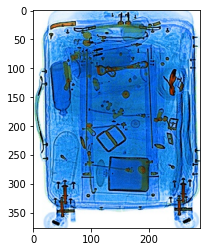

In [98]:
plt.imshow(background)

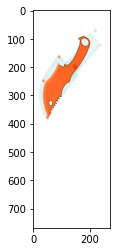

In [99]:
plt.imshow(threat)

In [100]:
#remove white pixels
from PIL import Image

img = Image.open('/content/BAGGAGE_20170523_094231_80428_B.jpg')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 0 and item[1] == 0 and item[2] == 0:
        newData.append((0, 0, 0, 255))
    else:
        if item[0] > 150:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
            print(item)


img.putdata(newData)
img.save("z1a.png", "PNG")

Streaming output truncated to the last 5000 lines.
(44, 105, 255, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(42, 103, 253, 255)
(42, 103, 253, 255)
(41, 102, 252, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(44, 105, 255, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(42, 103, 253, 255)
(42, 103, 253, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(44, 105, 255, 255)
(38, 100, 247, 255)
(42, 107, 251, 255)
(42, 107, 251, 255)
(40, 105, 251, 255)
(41, 102, 252, 255)
(40, 99, 251, 255)
(45, 102, 251, 255)
(51, 111, 255, 255)
(50, 112, 255, 255)
(36, 102, 251, 255)
(24, 90, 246, 255)
(66, 129, 255, 255)
(30, 87, 228, 255)
(61, 108, 224, 255)
(40, 78, 163, 255)
(0, 25, 89, 255)
(144, 176, 223, 255)
(107, 146, 221, 255)
(117, 161, 255, 255)
(94, 142, 253, 255)
(74, 125, 242, 255)
(74, 126, 244, 255)
(76, 132, 253

In [101]:
#remove white pixels and convert white border to black
from PIL import Image

img = Image.open('/content/BAGGAGE_20170523_094231_80428_B.jpg')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        if item[0] > 150:
            newData.append((0, 0, 0, 255))
        else:
            newData.append(item)
            print(item)


img.putdata(newData)
img.save("z1b.png", "PNG")

Streaming output truncated to the last 5000 lines.
(44, 105, 255, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(42, 103, 253, 255)
(42, 103, 253, 255)
(41, 102, 252, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(44, 105, 255, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(42, 103, 253, 255)
(42, 103, 253, 255)
(43, 104, 254, 255)
(43, 104, 254, 255)
(44, 105, 255, 255)
(38, 100, 247, 255)
(42, 107, 251, 255)
(42, 107, 251, 255)
(40, 105, 251, 255)
(41, 102, 252, 255)
(40, 99, 251, 255)
(45, 102, 251, 255)
(51, 111, 255, 255)
(50, 112, 255, 255)
(36, 102, 251, 255)
(24, 90, 246, 255)
(66, 129, 255, 255)
(30, 87, 228, 255)
(61, 108, 224, 255)
(40, 78, 163, 255)
(0, 25, 89, 255)
(144, 176, 223, 255)
(107, 146, 221, 255)
(117, 161, 255, 255)
(94, 142, 253, 255)
(74, 125, 242, 255)
(74, 126, 244, 255)
(76, 132, 253

In [102]:
#resize
from PIL import Image

basewidth = 150
img = Image.open('/content/z1a.png')
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('z2.png') 

In [103]:
#rotate
imgz = Image.open('/content/z2.png')

In [104]:
#rotate

from PIL import Image 
import PIL
img1 = imgz.rotate(-45, PIL.Image.NEAREST, expand = 1) 

In [106]:
#rotate
img1.save('z3.png') 

In [108]:
#pasting
from PIL import Image

background = Image.open("/content/BAGGAGE_20180811_175323_83216_B_1.jpg").convert("RGBA")
foreground = Image.open("/content/z3.png").convert("RGBA")

background.paste(foreground, (-100, 25), foreground)
background.show()
background.save('z4.png')

In [110]:
#blending
img1 = cv2.imread('/content/BAGGAGE_20180811_175323_83216_B_1.jpg')
out_img = cv2.imread('/content/z4.png')


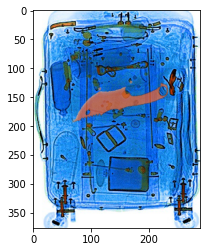

In [111]:
#blending
imgz = cv2.addWeighted(img1, 0.3, out_img, 0.7, 0)
plt.imshow(imgz) 

In [112]:
cv2.imwrite('zfinal.png', imgz)

True